In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

atom_colors = {"C": "k", "O": "r", "N": "b", "": "grey", "P": "orange", "F": "g", "Cl": "g", "S": "y"}

In [17]:
import os
print(os.getcwd())

import sys
sys.path.append(os.path.dirname(os.getcwd()))

from moha.lattice import Lattice
from moha.ppp import HubbardHamiltonian, HuckelHamiltonian, IsingHamiltonian, PPPHamiltonian
from moha.heisenberg import HeisenbergHamiltonian, RichardsonHamiltonian

C:\Users\wilha\ModelHamiltonian\demos


# Bravais lattices in up to 3 dimensions
- Automatic adjacency matrix generation
- Choice of major axis/axes for 1-D, 2-D systems
- Free specification of atom types

## Linear (1-D)

In [18]:
linear = Lattice.linear(n_sites=5, dist=1.0, axis=0, atom_types=["C", "O"])

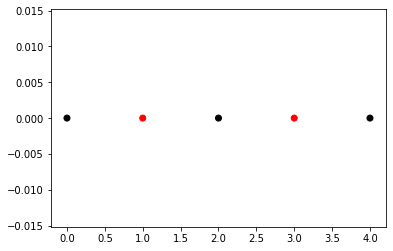

In [19]:
x = [site.coords[0] for site in linear.sites]
atoms = [atom_colors[site.atom_type] for site in linear.sites]
plt.scatter(x, [0 for _ in range(5)], c=atoms)

## Oblique, Rectangular, and Square (2-D)

In [20]:
oblique = Lattice.oblique(n_sites=(3,4), dist=(1, 1.5), angle=np.pi/6)
np.array(oblique.adjacency_matrix, dtype=int)

array([[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]])

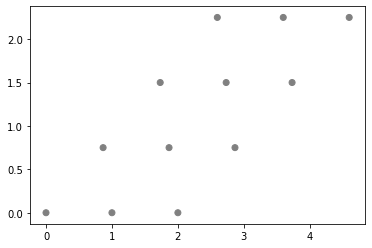

In [21]:
x = [site.coords[0] for site in oblique.sites]
y = [site.coords[1] for site in oblique.sites]
atoms = [atom_colors[site.atom_type] for site in oblique.sites]
plt.scatter(x, y, c=atoms)

## Orthorhombic, Tetragonal, Cubic (3-D)

In [22]:
cubic = Lattice.orthorhombic(n_sites=(3, 5, 4), atom_types=["C", "P", "N", "O"])


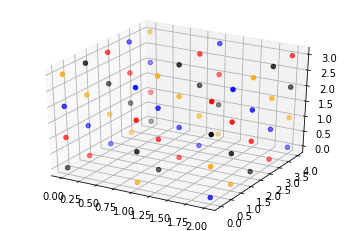

In [23]:
x = [site.coords[0] for site in cubic.sites]
y = [site.coords[1] for site in cubic.sites]
z = [site.coords[2] for site in cubic.sites]
atoms = [atom_colors[site.atom_type] for site in cubic.sites]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=atoms)

# Hamiltonian Transformations

$$ \hat{H} = \sum_{pq} h_{pq} a_p^\dagger a_q + \sum_{pqrs} V_{pqrs} a_p^\dagger a_q^\dagger a_s a_r $$
Need to generate one- and two-electron arrays ($ h_{pq} $ and $ V_{pqrs}$)

## Pariser-Parr-Pople Model
$$ \hat{H}_{\text{PPP}} = \sum_{i, \sigma} \alpha_{i} a_{i \sigma}^{\dagger} a_{i \sigma} + \sum_{\langle i, j \rangle, \sigma} \beta_{ij} a_{i \sigma}^{\dagger} a_{i \sigma} + 
\sum_{i} U_{i} a_{i \alpha}^{\dagger} a_{i \beta}^{\dagger} a_{i \beta} a_{i \alpha} + 
\sum_{i < j} V_{ij} (a_{i \alpha}^{\dagger} a_{i \alpha} + a_{i \beta}^{\dagger} a_{i \beta})(a_{j \alpha}^{\dagger} a_{j \alpha} + a_{j \beta}^{\dagger} a_{j \beta})
$$

In [24]:
alpha = np.array([1 for _ in range(5)])
beta = np.random.random((5,5))*linear.adjacency_matrix
u_matrix = np.arange(5) + 1
v_matrix = np.random.random((5,5))
ppp = PPPHamiltonian(alpha, beta, u_matrix, v_matrix)
one, two = ppp.return_full()
print(one[:5, :5], "\n", one[5:, 5:])

[[1.         0.90009027 0.         0.         0.        ]
 [0.20199808 1.         0.94799089 0.         0.        ]
 [0.         0.69276709 1.         0.60309933 0.        ]
 [0.         0.         0.00303723 1.         0.54186159]
 [0.         0.         0.         0.23423209 1.        ]] 
 [[1.         0.90009027 0.         0.         0.        ]
 [0.20199808 1.         0.94799089 0.         0.        ]
 [0.         0.69276709 1.         0.60309933 0.        ]
 [0.         0.         0.00303723 1.         0.54186159]
 [0.         0.         0.         0.23423209 1.        ]]


### Sparse format for large systems
75 sites (or 150 generalized orbitals) will require more than 4GB to allocate the dense array for $V_{pqrs} $. 

In [25]:
large_ortho = Lattice.orthorhombic(n_sites=(5,3,5))
alpha = np.array([1 for _ in range(75)])
beta = np.random.random((75,75))*large_ortho.adjacency_matrix
u_matrix = np.arange(75) + 1
v_matrix = np.random.random((75,75))
large_ppp = PPPHamiltonian(alpha, beta, u_matrix, v_matrix)
one, two = large_ppp.return_compact()
print("DOK (sparse) output size: {:f} MB".format(sys.getsizeof(two)/10**6))
print("Dense output size: {} GB".format(8 * 150 ** 4 / 10**9))

DOK (sparse) output size: 1.310832 MB
Dense output size: 4.05 GB


## Hubbard Model

$$ \hat{H}_{\text{Hubbard}} = \sum_{i, \sigma} \epsilon_{i} a_{i \sigma}^{\dagger} a_{i \sigma} + \sum_{\langle i, j \rangle, \sigma} t_{ij} a_{i \sigma}^{\dagger} a_{i \sigma} + 
\sum_{i} U_{i} a_{i \alpha}^{\dagger} a_{i \beta}^{\dagger} a_{i \beta} a_{i \alpha} $$

In [26]:
epsilon = np.array([1 for _ in range(5)])
t_matrix = np.random.random((5,5))*linear.adjacency_matrix
u_matrix = np.arange(5) + 1
hubbard = HubbardHamiltonian(epsilon, t_matrix, u_matrix)


## Hückel Model
$$ \hat{H}_{\text{Huckel}} = \sum_{i, \sigma} \alpha_{i} a_{i \sigma}^{\dagger} a_{i \sigma} + 
\sum_{i} \beta_{i} a_{i \alpha}^{\dagger} a_{i \beta}^{\dagger} a_{i \beta} a_{i \alpha} $$

In [27]:
alpha = np.array([1 for _ in range(5)])
beta = np.arange(5) + 1
huckel = HuckelHamiltonian(alpha, beta)

## Ising Model

$$ \hat{H}_{\text{Ising}} = \sum_{i, \sigma} \epsilon_{i} a_{i \sigma}^{\dagger} a_{i \sigma} + 
\sum_{i < j} \eta_{ij} (a_{i \alpha}^{\dagger} a_{i \alpha} + a_{i \beta}^{\dagger} a_{i \beta})(a_{j \alpha}^{\dagger} a_{j \alpha} + a_{j \beta}^{\dagger} a_{j \beta})
$$

In [28]:
epsilon = np.array([1 for _ in range(5)])
eta = np.random.random((5,5))
ising = IsingHamiltonian(epsilon, eta)

## Heisenberg Model

$$ \hat{H}_{\text{Heisenberg}} = \sum_{i, \sigma} \epsilon_i \hat{S}_i^Z + \sum_{i, j} g_{ij} \hat{S}_i^+ \hat{S}_j^- + \sum_{i, j} h_{ij} \hat{S}_i^Z \hat{S}_j^Z
$$

In [29]:
e_matrix = np.arange(5) + 1
g_matrix = np.random.random((5,5))
h_matrix = np.random.random((5,5))
heisenberg = HeisenbergHamiltonian(e_matrix, g_matrix, h_matrix)

## Richardson Model

$$ \hat{H}_{\text{Heisenberg}} = \sum_{i, \sigma} \epsilon_i \hat{S}_i^Z + g \sum_{i, j} \hat{S}_i^+ \hat{S}_j^- 
$$

In [30]:
e_matrix = np.arange(5) + 1
g = 1.5
richardson = RichardsonHamiltonian(e_matrix, g)